In [1]:
import pandas as pd
import time

### Read Files

In [2]:
asset_details = pd.read_csv('data/g-research-crypto-forecasting/asset_details.csv')

In [3]:
asset_details = asset_details.sort_values('Asset_ID').reset_index(drop=True)

In [4]:
%%time
#train = pd.read_csv('data/g-research-crypto-forecasting/train.csv')
#train.to_parquet('data/train.parquet')
train = pd.read_parquet('data/train.parquet')

CPU times: user 4.52 s, sys: 3.36 s, total: 7.88 s
Wall time: 2.32 s


In [5]:
supp_train = pd.read_csv('data/g-research-crypto-forecasting/supplemental_train.csv')

### Asset details

In [6]:
asset_details

,Asset_ID,Weight,Asset_Name
0,0,4.304065,Binance Coin
1,1,6.779922,Bitcoin
2,2,2.397895,Bitcoin Cash
3,3,4.406719,Cardano
4,4,3.555348,Dogecoin
5,5,1.386294,EOS.IO
6,6,5.894403,Ethereum
7,7,2.079442,Ethereum Classic
8,8,1.098612,IOTA
9,9,2.397895,Litecoin


### Train data

In [7]:
train

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [8]:
print('Train time range')
print(pd.to_datetime(train.timestamp.min(), unit='s'), '-', pd.to_datetime(train.timestamp.max(), unit='s'))

Train time range
2018-01-01 00:01:00 - 2021-09-21 00:00:00


In [9]:
print('Entries per token')
train.groupby('Asset_ID').size()

Entries per token


Asset_ID
0     1942619
1     1956282
2     1953537
3     1791867
4     1156866
5     1955140
6     1956200
7     1951127
8     1592071
9     1956030
10     670497
11    1701261
12    1778749
13    1874560
dtype: int64

In [10]:
print('number of nan values per asset and per column')
train.groupby('Asset_ID').count().sub(train.groupby('Asset_ID').size(), axis=0).abs()

number of nan values per asset and per column


,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target
Asset_ID,,,,,,,,,
0,0,0,0,0,0,0,0,0,13415
1,0,0,0,0,0,0,0,0,304
2,0,0,0,0,0,0,0,0,4861
3,0,0,0,0,0,0,0,0,18731
4,0,0,0,0,0,0,0,0,144974
5,0,0,0,0,0,0,0,0,2302
6,0,0,0,0,0,0,0,0,340
7,0,0,0,0,0,0,0,0,9326
8,0,0,0,0,0,0,0,0,193106


In [11]:
train[train.isna().any(1)]

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
7,1514764860,11,7.0,329.090000,329.880000,329.090000,329.460000,6.635710e+00,329.454118,NaN
44,1514765160,7,76.0,26.425500,27.073000,25.550000,26.400000,1.857937e+03,26.352542,NaN
95,1514765520,11,8.0,327.670000,327.680000,326.770000,326.770000,1.790163e+01,326.990493,NaN
111,1514765640,11,8.0,326.930000,327.960000,326.220000,327.910000,2.684030e+01,326.476237,NaN
116,1514765700,7,12.0,26.441000,27.070000,25.812000,26.399000,1.638301e+02,26.449597,NaN
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


<AxesSubplot:xlabel='timestamp'>

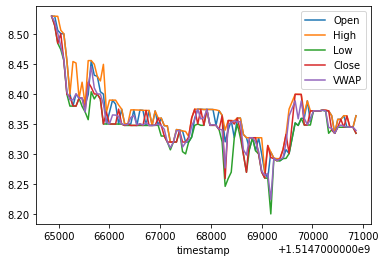

In [21]:
train[train.Asset_ID == 0].set_index('timestamp')[['Open', 'High', 'Low', 'Close', 'VWAP']][:100].plot()